In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import scipy
from scipy.stats import kendalltau
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import preprocessing
from matplotlib.mlab import PCA as mlabPCA
from sklearn.decomposition import PCA 
import scipy.stats as stats
import math

In [2]:
loan=pd.read_csv('loan.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
loan.shape

(887379, 74)

In [6]:
loan.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [7]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1323886d8>]], dtype=object)

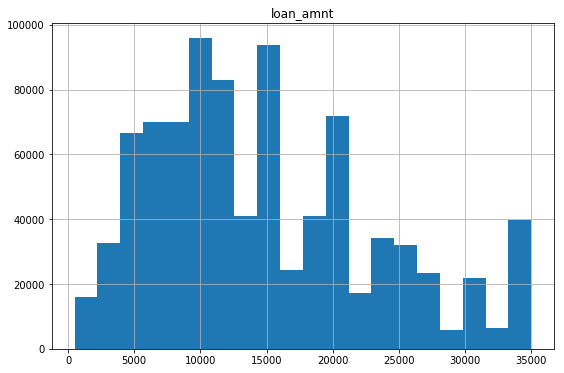

In [8]:
loan.hist(column='loan_amnt', figsize=(9,6),bins=20)

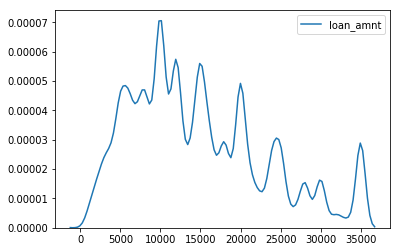

In [9]:
sns.kdeplot(loan['loan_amnt'])

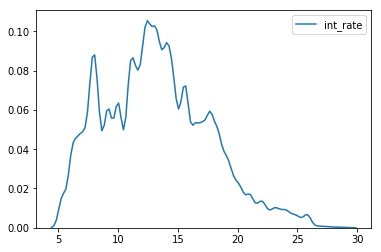

In [10]:
sns.kdeplot(loan['int_rate'])

In [11]:
loan.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,1.000000,0.999443,0.063803,0.066058,0.071502,-0.142963,0.025347,0.033990,0.067781,0.049648,...,0.009510,0.009703,0.011797,0.004960,-0.000543,0.000428,0.048724,-0.013579,-0.000914,0.014084
member_id,0.999443,1.000000,0.064461,0.066754,0.072308,-0.142205,0.026036,0.034146,0.067824,0.049904,...,0.005955,0.009033,0.006729,0.003529,-0.003295,0.000492,0.048660,-0.013022,-0.005038,0.012763
loan_amnt,0.063803,0.064461,1.000000,0.999263,0.997115,0.145023,0.944977,0.332698,0.020675,-0.000159,...,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
funded_amnt,0.066058,0.066754,0.999263,1.000000,0.998025,0.145160,0.946005,0.332466,0.021075,0.000151,...,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
funded_amnt_inv,0.071502,0.072308,0.997115,0.998025,1.000000,0.145205,0.943632,0.331420,0.022185,0.000648,...,0.135529,-0.107337,-0.051439,-0.028118,0.412268,0.018969,0.312473,0.009548,0.071515,0.007820
int_rate,-0.142963,-0.142205,0.145023,0.145160,0.145205,1.000000,0.133075,-0.072786,0.079903,0.055178,...,0.053045,0.183565,0.176683,0.171105,-0.104402,0.288049,-0.166119,0.171162,0.020711,0.252637
installment,0.025347,0.026036,0.944977,0.946005,0.943632,0.133075,1.000000,0.326182,0.014333,0.007876,...,0.116193,-0.102522,-0.022923,-0.004324,0.385694,0.025131,0.286829,0.015213,0.056176,0.029699
annual_inc,0.033990,0.034146,0.332698,0.332466,0.331420,-0.072786,0.326182,1.000000,-0.087410,0.047470,...,0.215808,-0.050157,-0.006532,-0.011844,0.323838,0.009813,0.268860,0.063758,0.052432,0.079720
dti,0.067781,0.067824,0.020675,0.021075,0.022185,0.079903,0.014333,-0.087410,1.000000,-0.002831,...,0.028134,-0.004285,-0.003016,-0.001053,0.010856,0.034614,0.032941,0.011065,0.011851,0.003552
delinq_2yrs,0.049648,0.049904,-0.000159,0.000151,0.000648,0.055178,0.007876,0.047470,-0.002831,1.000000,...,0.061545,-0.012308,-0.025960,-0.054318,-0.063617,0.003157,-0.041070,0.040830,0.014746,0.034490


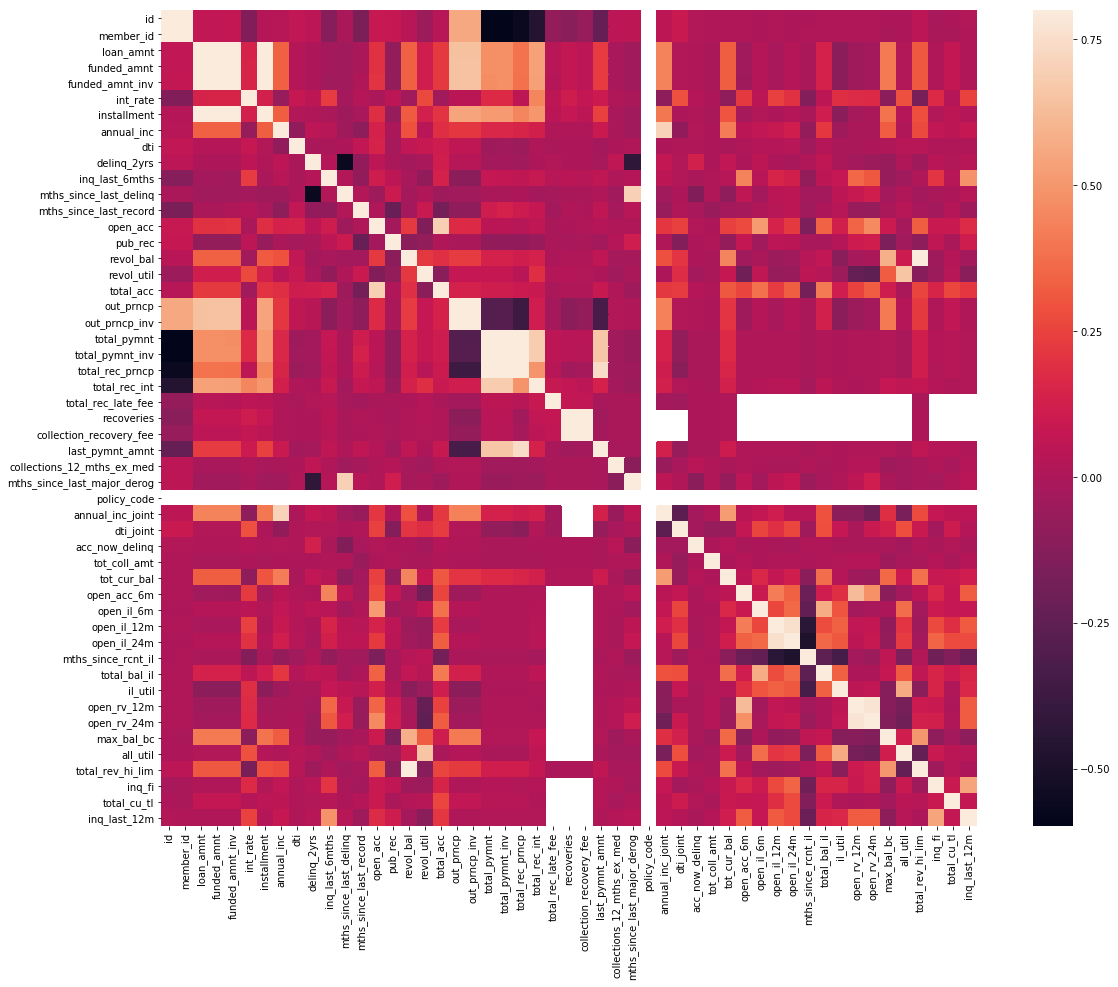

In [12]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(loan.corr(), vmax=.8, square=True)

In [13]:
loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [14]:
def process_frame(df):
    
    #drop problematic columns:
    df=df.drop(['emp_title', 'id', 'member_id', 'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 
                'zip_code', 'addr_state', 'policy_code', 'initial_list_status', 'recoveries', 
                'collection_recovery_fee', 'next_pymnt_d', 'last_credit_pull_d', 'verification_status', 
                'verification_status_joint', 'last_pymnt_d','sub_grade','application_type','last_pymnt_amnt'], axis=1)
    
    new_df=NaN_to_zeroes(df)
    new_df=term_as_binary(new_df)
    new_df=emp_length_to_num(new_df)
    new_df=earliest_cr_line_to_num(new_df)
    new_df=loan_status_to_binary(new_df)
    new_df=pd.get_dummies(new_df,columns=['grade','home_ownership'])
    
    #drop columns made redundant by processing:
    new_df=new_df.drop(['term','loan_status'], axis=1)
    
    selected_features_and_target=['emp_length','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',
       'total_rec_late_fee',  
       'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'long_term', 'grade_A',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'defaulted']
    new_df=new_df[selected_features_and_target]
    return new_df

In [15]:
# Generally for missing data, see: https://pandas.pydata.org/pandas-docs/stable/missing_data.html
# Also, the fillna function is useful: 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
def NaN_to_zeroes(df):
    df.fillna(value=0,inplace=True)
    return df

In [16]:
def term_as_binary(df):
    with_binary_term=df.copy() 
    long_term=(df.loc[:,'term']==' 60 months')
    with_binary_term['long_term']=long_term
    return with_binary_term

In [17]:
def emp_length_to_num(df):
    df.emp_length = df.emp_length.astype(str)
    df.emp_length = df.emp_length.str.replace('years','year')
    df.emp_length = df.emp_length.str.replace('< 1','0')
    df.emp_length = df.emp_length.str.replace('+','')
    df.emp_length = df.emp_length.str.replace(' year','')
    df.emp_length = df.emp_length.astype(float)
    years_right=df.copy()
    return years_right

In [18]:
def earliest_cr_line_to_num(df):
    for month in ['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']:
        df.loc[:,'earliest_cr_line']=df.loc[:,'earliest_cr_line'].str.replace(month,'')
    df.loc[:,'earliest_cr_line']=df.loc[:,'earliest_cr_line'].astype(float)
    df.loc[:,'earliest_cr_line']=2016 - df.loc[:,'earliest_cr_line']
    no_months=df.copy()
    return no_months

In [19]:
def loan_status_to_binary(df):
    #We are predicting if a loan will ultimately "default." 
    #We are defining "default" as: any loan status that is not fully paid. "Current" loans are still in process and so 
    #will be excluded from our training and target sets.
    df=df.loc[df['loan_status']!='Current',:]
    df.loc[df['loan_status']=='Fully Paid','defaulted'] = False
    df.loc[df['loan_status']!='Fully Paid','defaulted'] = True
    return df

In [20]:
final=process_frame(loan)

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
final.dropna(axis=0,inplace=True)

In [22]:
final.head()

,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,earliest_cr_line,...,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,defaulted
0,10.0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,31.0,...,0,1,0,0,0,0,0,0,1,False
1,0.0,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,17.0,...,0,0,1,0,0,0,0,0,1,True
2,10.0,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,15.0,...,0,0,1,0,0,0,0,0,1,False
3,10.0,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,20.0,...,0,0,1,0,0,0,0,0,1,False
5,3.0,5000.0,5000.0,5000.0,7.90,156.46,36000.0,11.20,0.0,12.0,...,1,0,0,0,0,0,0,0,1,False


In [23]:
# Assemble training and test sets, features and targets.
training_set=final.iloc[::2,:].copy()
test_set=final.iloc[1::2,:].copy()

In [24]:
#Using a correlation-based 'hunch' based on correlation matrix:
hunch=['emp_length','delinq_2yrs','dti','dti_joint','inq_last_6mths','revol_bal','open_acc',
                       'total_bal_il','total_rec_late_fee','long_term','revol_util',
                       'acc_now_delinq','earliest_cr_line']
training_features=training_set[hunch]
training_target=training_set['defaulted']
test_features=test_set[hunch]
test_target=test_set['defaulted']

# Get a baseline with a Linear Regression model.
regr = linear_model.LinearRegression()

# Fit our model to our training data.
regr.fit(training_features,training_target)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Performance on the training data:
print('R squared of model on training data: \n',regr.score(training_features,training_target)) 

# Performance on the test data:
print('R squared of model on test data: \n',regr.score(test_features,test_target))

Coefficients: 
 [ -3.73949906e-03   2.39049044e-02   6.59921679e-03   1.13247668e-02
   2.82781075e-02  -3.89661537e-07  -1.30102461e-03   7.81874829e-06
   1.08385591e-02   1.52483053e-01   1.13463115e-03   4.84130905e-02
  -2.43903606e-03]
Intercept: 
 0.101040691814
R squared of model on training data: 
 0.107922811809
R squared of model on test data: 
 0.105285339555


In [25]:
#Using all possible features so that we can use feature importances in random forest:
training_features=training_set.drop(columns=['defaulted'])
training_target=training_set['defaulted']
test_features=test_set.drop(columns=['defaulted'])
test_target=test_set['defaulted']
rfc = ensemble.RandomForestClassifier()
rfc.fit(training_features,training_target)
score=rfc.score(test_features,test_target)
print("Accuracy: " + str(score))

Accuracy: 0.76478621704


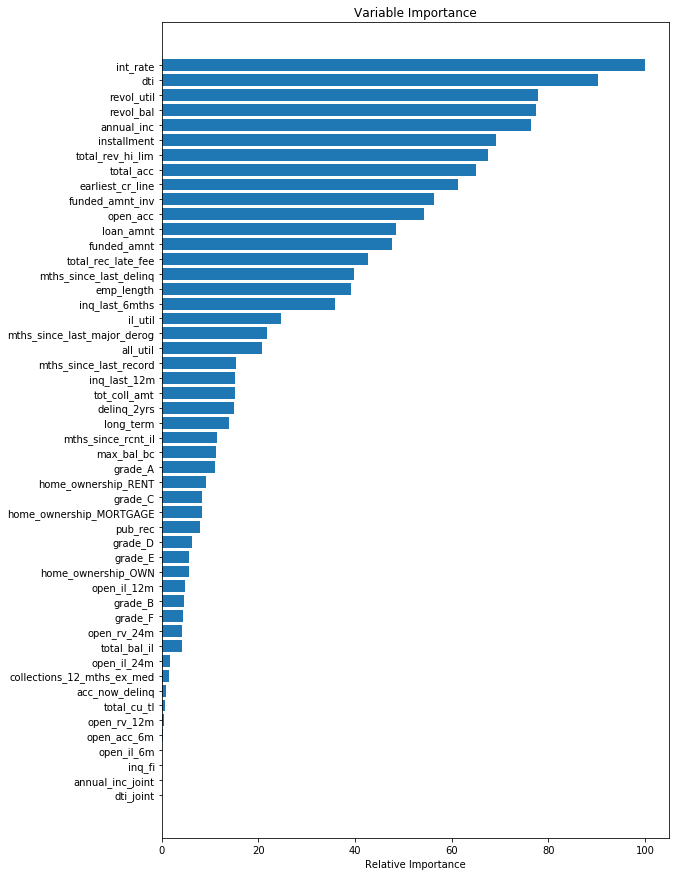

In [26]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
f, ax = plt.subplots(figsize=(20, 15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, training_features.columns[sorted_idx])

# Make a variable that is a list of the top features so we can use it as selected feature columns in models below
top_features=training_features.columns[sorted_idx]

plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [27]:
#Create a DataFrame to record and compare performance of the various models.
df_scores=pd.DataFrame()

In [28]:
#Using top 24 features identified by feature importances in random forest.
training_features=training_set[top_features[-24:]]
training_target=training_set['defaulted']
test_features=test_set[top_features[-24:]]
test_target=test_set['defaulted']

max_score=0

for NumTree in [5,10,15,20]:
    for MaxDepth in [2,3,5]:
        rfc = ensemble.RandomForestClassifier(n_estimators=NumTree,max_depth=MaxDepth)

        # Fit the model.
        rfc.fit(training_features,training_target)
        print('Number of Trees: ' + str(NumTree))
        print('Max Depth: ' + str(MaxDepth))
        
        # Score the model
        score=rfc.score(test_features,test_target)
        print("Accuracy: " + str(score))
        if score > max_score:
            max_score = score

df_scores.loc['RandomForestTop24','score'] = score

Number of Trees: 5
Max Depth: 2
Accuracy: 0.754911230171
Number of Trees: 5
Max Depth: 3
Accuracy: 0.757320446826
Number of Trees: 5
Max Depth: 5
Accuracy: 0.765815736947
Number of Trees: 10
Max Depth: 2
Accuracy: 0.755289421158
Number of Trees: 10
Max Depth: 3
Accuracy: 0.755933746542
Number of Trees: 10
Max Depth: 5
Accuracy: 0.76557061316
Number of Trees: 15
Max Depth: 2
Accuracy: 0.756753160346
Number of Trees: 15
Max Depth: 3
Accuracy: 0.763798718353
Number of Trees: 15
Max Depth: 5
Accuracy: 0.76596281122
Number of Trees: 20
Max Depth: 2
Accuracy: 0.754897223098
Number of Trees: 20
Max Depth: 3
Accuracy: 0.755954757152
Number of Trees: 20
Max Depth: 5
Accuracy: 0.763539587492


In [29]:
# Check if reducing the number of features to 24 improved performance relative to using all the features:
training_features=training_set.drop(columns=['defaulted'])
training_target=training_set['defaulted']
test_features=test_set.drop(columns=['defaulted'])
test_target=test_set['defaulted']

max_score=0

for NumTree in [5,10,15,20]:
    for MaxDepth in [2,3,5]:
        rfc = ensemble.RandomForestClassifier(n_estimators=NumTree,max_depth=MaxDepth)

        # Fit the model.
        rfc.fit(training_features,training_target)
        print('Number of Trees: ' + str(NumTree))
        print('Max Depth: ' + str(MaxDepth))
        
        # Score the model
        score=rfc.score(test_features,test_target)
        print("Accuracy: " + str(score))
        if score > max_score:
            max_score = score
        
df_scores.loc['RandomForestAll','score'] = score

Number of Trees: 5
Max Depth: 2
Accuracy: 0.756017788983
Number of Trees: 5
Max Depth: 3
Accuracy: 0.75637496936
Number of Trees: 5
Max Depth: 5
Accuracy: 0.765878768778
Number of Trees: 10
Max Depth: 2
Accuracy: 0.75622089155
Number of Trees: 10
Max Depth: 3
Accuracy: 0.75622089155
Number of Trees: 10
Max Depth: 5
Accuracy: 0.768855271912
Number of Trees: 15
Max Depth: 2
Accuracy: 0.756080820815
Number of Trees: 15
Max Depth: 3
Accuracy: 0.756991280597
Number of Trees: 15
Max Depth: 5
Accuracy: 0.764323983612
Number of Trees: 20
Max Depth: 2
Accuracy: 0.756360962286
Number of Trees: 20
Max Depth: 3
Accuracy: 0.756367965823
Number of Trees: 20
Max Depth: 5
Accuracy: 0.765185418636


In [30]:
# Try a greater number of estimators and more depth, with all features.
training_features=training_set.drop(columns=['defaulted'])
training_target=training_set['defaulted']
test_features=test_set.drop(columns=['defaulted'])
test_target=test_set['defaulted']
rfc = ensemble.RandomForestClassifier(n_estimators=50,max_depth=10)
rfc.fit(training_features,training_target)
print('Number of Trees: 50')
print('Max Depth: 10')       
score=rfc.score(test_features,test_target)
print("Accuracy: " + str(score))
df_scores.loc['RndmForAll50Trees','score'] = score

Number of Trees: 50
Max Depth: 10
Accuracy: 0.775060405505


In [31]:
# Try a greater number of estimators and more depth, with just the 24 features.
training_features=training_set[top_features[-24:]]
training_target=training_set['defaulted']
test_features=test_set[top_features[-24:]]
test_target=test_set['defaulted']
rfc = ensemble.RandomForestClassifier(n_estimators=50,max_depth=10)
rfc.fit(training_features,training_target)
print('Number of Trees: 50')
print('Max Depth: 10')       
score=rfc.score(test_features,test_target)
proba=rfc.predict_proba(test_features)
print("Accuracy: " + str(score))
print("Probability: " + str(proba))
df_scores.loc['RndFor24Top50Trees','score'] = score

Number of Trees: 50
Max Depth: 10
Accuracy: 0.776033897118
Probability: [[ 0.37313688  0.62686312]
 [ 0.55392163  0.44607837]
 [ 0.74771356  0.25228644]
 ..., 
 [ 0.60141875  0.39858125]
 [ 0.87353954  0.12646046]
 [ 0.89976914  0.10023086]]


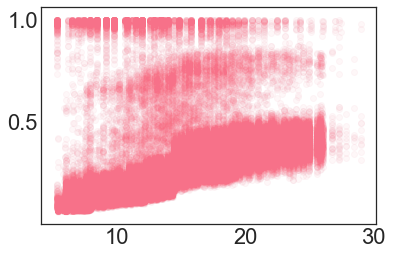

In [50]:
x=test_features['int_rate']
y=proba[:,1]
plt.scatter(x,y,alpha=0.05)


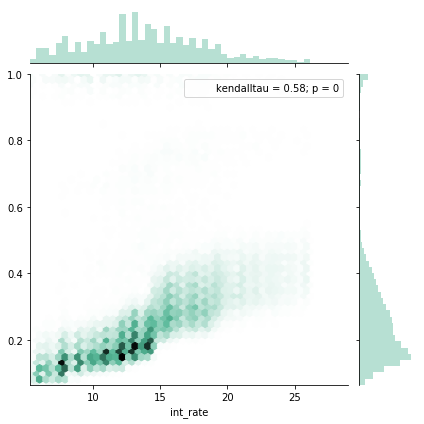

In [33]:
sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

In [34]:
#super-interesting to show something like these at the end.

In [35]:
#Trying just the top 10 features identified by feature importances in random forest.
training_features=training_set[top_features[-10:]]
training_target=training_set['defaulted']
test_features=test_set[top_features[-10:]]
test_target=test_set['defaulted']

max_score = 0

for NumTree in [5,10,15,20]:
    for MaxDepth in [2,3,5]:
        rfc = ensemble.RandomForestClassifier(n_estimators=NumTree,max_depth=MaxDepth)

        # Fit the model.
        rfc.fit(training_features,training_target)
        print('Number of Trees: ' + str(NumTree))
        print('Max Depth: ' + str(MaxDepth))
        
        # Score the model
        score=rfc.score(test_features,test_target)
        print("Accuracy: " + str(score))
        if score > max_score:
            max_score = score
            
df_scores.loc['RandomForestTop10','score'] = score

Number of Trees: 5
Max Depth: 2
Accuracy: 0.728619953076
Number of Trees: 5
Max Depth: 3
Accuracy: 0.728619953076
Number of Trees: 5
Max Depth: 5
Accuracy: 0.732906117589
Number of Trees: 10
Max Depth: 2
Accuracy: 0.728619953076
Number of Trees: 10
Max Depth: 3
Accuracy: 0.728619953076
Number of Trees: 10
Max Depth: 5
Accuracy: 0.730671989355
Number of Trees: 15
Max Depth: 2
Accuracy: 0.728619953076
Number of Trees: 15
Max Depth: 3
Accuracy: 0.728619953076
Number of Trees: 15
Max Depth: 5
Accuracy: 0.730664985818
Number of Trees: 20
Max Depth: 2
Accuracy: 0.728619953076
Number of Trees: 20
Max Depth: 3
Accuracy: 0.728619953076
Number of Trees: 20
Max Depth: 5
Accuracy: 0.731981650734


In [36]:
print(top_features[-10:])

Index(['funded_amnt_inv', 'earliest_cr_line', 'total_acc', 'total_rev_hi_lim',
       'installment', 'annual_inc', 'revol_bal', 'revol_util', 'dti',
       'int_rate'],
      dtype='object')


In [37]:
#Try top four in a Gradient Boosting Classifier with various parameters:
training_features=training_set[top_features[-4:]]
training_target=training_set['defaulted']
test_features=test_set[top_features[-4:]]
test_target=test_set['defaulted']

max_score = 0

for n,depth,loss_function in [[250,2,'exponential'],[500,2,'exponential'],
                              [250,3,'exponential'],[500,3,'exponential'],
                              [250,2,'deviance'],[500,2,'deviance'],
                              [250,3,'deviance'],[500,3,'deviance']]:
    params = {'n_estimators': n,'max_depth': depth,'loss': loss_function}
    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(training_features, training_target)
    # Score the model
    score=clf.score(test_features,test_target)
    print("Accuracy: " + str(score))
    if score> max_score:
        max_score = score
    
df_scores.loc['GradientBoostingClassifier','score'] = score

Accuracy: 0.736505935497
Accuracy: 0.740736071716
Accuracy: 0.738011695906
Accuracy: 0.743166298981
Accuracy: 0.737129250271
Accuracy: 0.742718072627
Accuracy: 0.739657527051
Accuracy: 0.744356900235


In [38]:
# try Logistic Regression:
training_features=training_set[top_features[-4:]]
training_target=training_set['defaulted']
test_features=test_set[top_features[-4:]]
test_target=test_set['defaulted']

max_score = 0

for RegNum in [1,2]:
    for C in [0.1,0.5,1,100,100000,1e7,1e9]:
        # Declare a logistic regression classifier, with L1 or L2 penalty and parameter regularization coefficient C.
        lr = LogisticRegression(penalty='l{}'.format(RegNum),C=C)

        # Fit the model.
        lr.fit(training_features, training_target)
        print('Regularization technique: L' + str(RegNum))
        print('Regularization coefficient: ' + str(C))
        
        # Score the model
        score=lr.score(test_features,test_target)
        print("Accuracy: " + str(score))
        if score > max_score:
            max_score = score
            
df_scores.loc['LogisticRegression','score'] = score

Regularization technique: L1
Regularization coefficient: 0.1
Accuracy: 0.732583954897
Regularization technique: L1
Regularization coefficient: 0.5
Accuracy: 0.7321847533
Regularization technique: L1
Regularization coefficient: 1
Accuracy: 0.732296809889
Regularization technique: L1
Regularization coefficient: 100
Accuracy: 0.732324824036
Regularization technique: L1
Regularization coefficient: 100000
Accuracy: 0.732156739153
Regularization technique: L1
Regularization coefficient: 10000000.0
Accuracy: 0.732331827573
Regularization technique: L1
Regularization coefficient: 1000000000.0
Accuracy: 0.732296809889
Regularization technique: L2
Regularization coefficient: 0.1
Accuracy: 0.728619953076
Regularization technique: L2
Regularization coefficient: 0.5
Accuracy: 0.728619953076
Regularization technique: L2
Regularization coefficient: 1
Accuracy: 0.728619953076
Regularization technique: L2
Regularization coefficient: 100
Accuracy: 0.728619953076
Regularization technique: L2
Regularizati

In [39]:
# Try K Nearest Neighbors
training_features=training_set[top_features[-4:]]
training_target=training_set['defaulted']
test_features=test_set[top_features[-4:]]
test_target=test_set['defaulted']

max_score = 0

# Normalize the features
scaler=StandardScaler()
training_features_normal=scaler.fit_transform(training_features)
test_features_normal=scaler.fit_transform(test_features)

# Conduct a grid search on the hyper-parameter "k"
for k in [1,5,10,15,30,100,500]:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_features_normal, training_target)
    score=knn.score(test_features_normal,test_target)
    print("Accuracy: " + str(score))
    if score > max_score:
        max_score = score
        
df_scores.loc['KNN','score'] = score

Accuracy: 0.633147739609
Accuracy: 0.69034562454
Accuracy: 0.719781489652
Accuracy: 0.71889204048
Accuracy: 0.728444864657
Accuracy: 0.732429877088
Accuracy: 0.732850089295


In [40]:
df_scores.sort_values(by ='score',ascending=False,inplace=True)
print(df_scores)

                               score
RndFor24Top50Trees          0.776034
RndmForAll50Trees           0.775060
RandomForestAll             0.765185
RandomForestTop24           0.763540
GradientBoostingClassifier  0.744357
KNN                         0.732850
RandomForestTop10           0.731982
LogisticRegression          0.728620


In [41]:
test_set['defaulted'].describe()
#104,036 / 142,785 = 0.728619

count     142785
unique         2
top        False
freq      104036
Name: defaulted, dtype: object

In [42]:
baseline = 1- test_set['defaulted'].mean()
print(baseline)

0.728619953076


In [43]:
df_scores['PercentImprovement'] = ((df_scores['score'] - baseline)/baseline)*100

In [44]:
df_scores['score'].values

array([ 0.7760339 ,  0.77506041,  0.76518542,  0.76353959,  0.7443569 ,
        0.73285009,  0.73198165,  0.72861995])

In [45]:
df_scores['score'].index

Index(['RndFor24Top50Trees', 'RndmForAll50Trees', 'RandomForestAll',
       'RandomForestTop24', 'GradientBoostingClassifier', 'KNN',
       'RandomForestTop10', 'LogisticRegression'],
      dtype='object')

Text(0.5,1,'Model Performances')

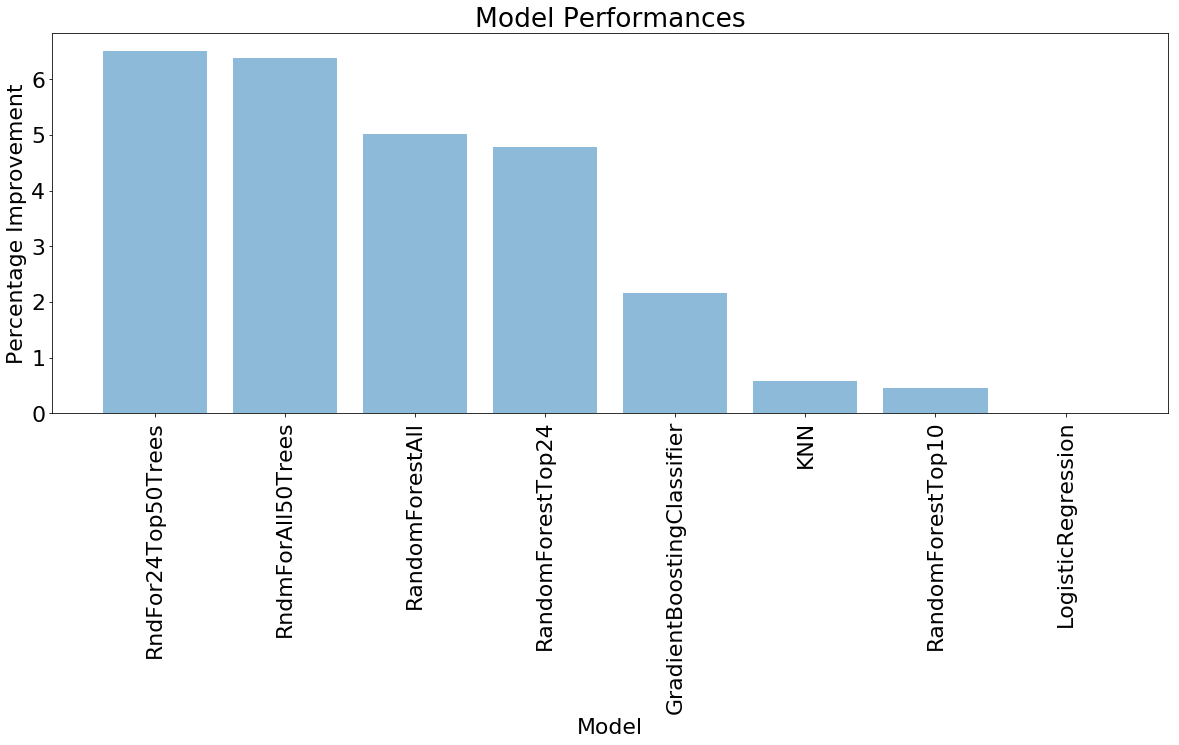

In [46]:
# Make a histogram of model performances:

model = df_scores['score'].index
performance = df_scores['PercentImprovement'].values
plt.figure(figsize=(20,7)) 
plt.rcParams.update({'font.size': 22})
plt.bar(range(len(df_scores)),performance, align='center', alpha=0.5,tick_label=model)
plt.xticks(rotation='vertical')
plt.xlabel('Model')
plt.ylabel('Percentage Improvement')
plt.title('Model Performances')


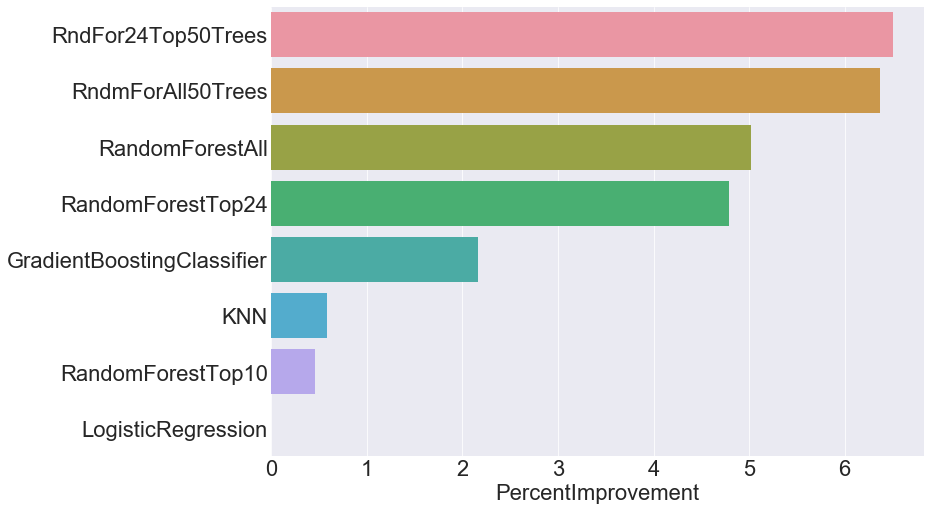

In [47]:
sns.set_style("darkgrid")
sns.set_palette("husl") 
sns.barplot(y=df_scores.index,x=df_scores.PercentImprovement)
#.gcf() = "get current figure"
plt.gcf().set_size_inches(11.7, 8.27)

In [48]:
# Make a dataframe with just the four continuous variables and the boolean outcome variable.
top_four=list(top_features[-4:])
the_five=top_four + ['defaulted']
final_five = training_set[the_five]
final_five.head()

,revol_bal,revol_util,dti,int_rate,defaulted
0,13648.0,83.7,27.65,10.65,False
2,2956.0,98.5,8.72,15.96,False
5,7963.0,28.3,11.20,7.90,False
8,5210.0,32.6,5.55,21.28,True
10,4032.0,20.6,16.12,14.65,False


/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


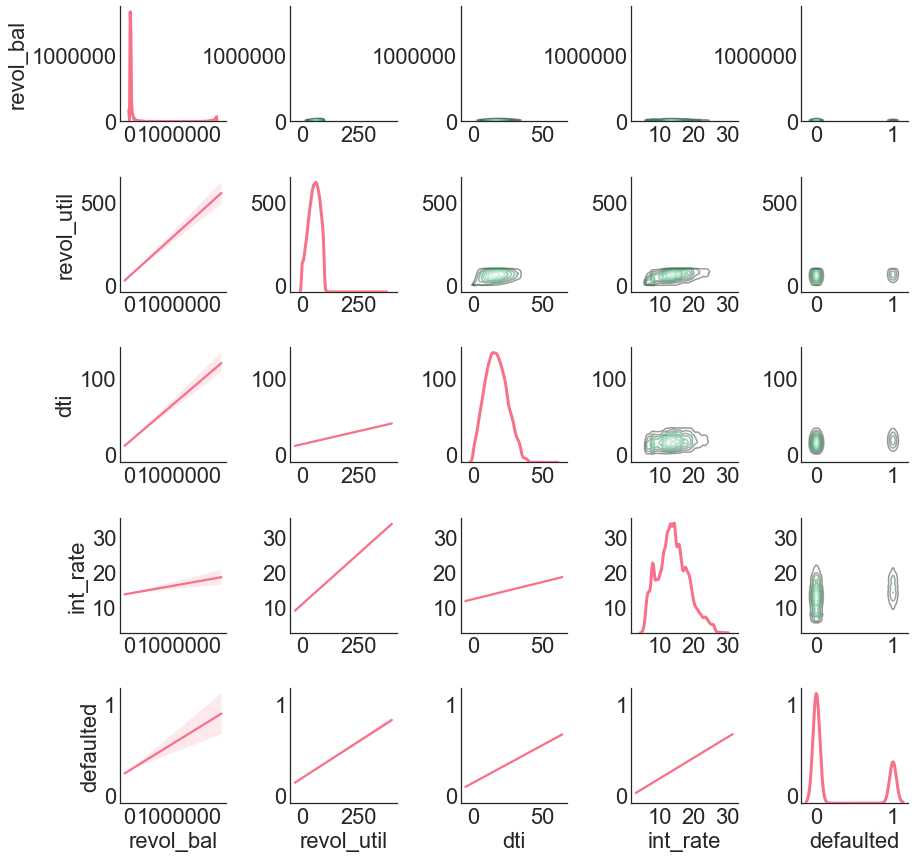

In [49]:
sns.set_style("white")
# Make a scatterplot matrix.
m = sns.PairGrid(final_five, diag_sharey=False)

# 2D KDEplot in upper right
m.map_upper(sns.kdeplot, alpha=.5)

# Fit line in lower left summarizing the linear relationship of the two variables.
m.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# On the diagonal, give Kernel Density Estimation of each variable.
m.map_diag(sns.kdeplot, lw=3)